### Student Activity: Market Analysis

This program reads daily stock data from a CSV and plots three different charts for three different analyses: pie (sector frequency distribution), bar (top 20 market cap companies), and scatter (price vs. earnings relationship).

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

### Read CSV in as DataFrame

In [2]:
# Set the path
csvpath= Path('../Resources/sp500_companies.csv')

# Read in the CSV as a DataFrame
df= pd.read_csv(csvpath)
df.head(7)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6242377704,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Calculate Sector Counts

In [3]:
# Count the frequency of each sector from the list of companies
df1= df['Sector'].value_counts()
df1.head()

Consumer Discretionary    84
Information Technology    70
Financials                68
Industrials               67
Health Care               61
Name: Sector, dtype: int64

### Plot Sector Counts

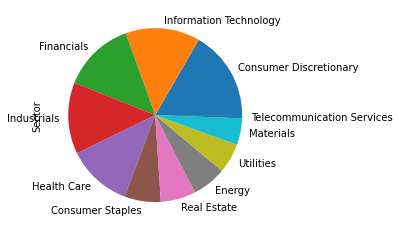

In [4]:
# Plot a pie chart from the distribution of company sectors
df1.plot(kind= 'pie')

### Filter By Top 20 Market Cap Companies

In [6]:
# Grab the `Symbol` and `Market Cap` columns
df2= df.loc[:, ['Symbol', 'Market Cap']]

# Set the 'Symbol' as the index
df2.set_index(df['Symbol'], inplace= True)

# Drop the extra 'Symbol' column
df2.drop(columns= ['Symbol'], inplace= True)

# Filter down to 20 companies with the largest market caps
df3= df2.nlargest(20,'Market Cap')

# Display the DataFrame
df3

,Market Cap
Symbol,
AAPL,809508034020
GOOGL,733823966137
GOOG,728535558140
MSFT,689978437468
AMZN,685873374731
FB,523423036576
JPM,386613611000
JNJ,353062464971
XOM,326148660000


### Plot Top 20 Market Cap Companies

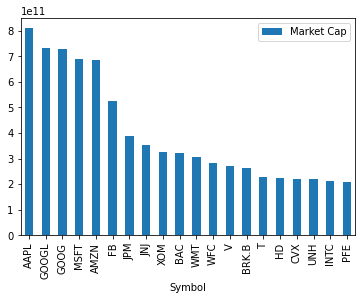

In [7]:
# Plot a bar chart of the top 20 market cap companies
df3.plot(kind= 'bar')

### Plot Relationship Between Price and Earnings/Share

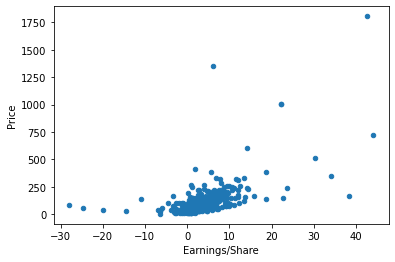

In [8]:
# Plot a scatter plot to dispay the relationship between price vs. earnings/share
df.plot(kind= 'scatter', x= 'Earnings/Share', y= 'Price')